In [1]:
import librosa
import librosa.display
import seaborn as sbn
import matplotlib.pyplot as mplt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from IPython.display import Audio
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [3]:
# path = os.getcwd()
# file_name = ""
ravdessData = "C:\\Users\\Nishant\\Documents\\JupyterPro\\SpeechEmotion\\AudioDataSet\\audio_speech_actors_01-24\\"

In [4]:
ravdessDirectoryList = os.listdir(ravdessData)

fileEmotion = []
filePath = []

for directory in ravdessDirectoryList:
    actorFiles = os.listdir(os.path.join(ravdessData, directory))
    for file in actorFiles:
        parts = file.split('.')[0].split('-')
        fileEmotion.append(int(parts[2]))
        filePath.append(os.path.join(ravdessData, directory, file))

emotion_df = pd.DataFrame(fileEmotion, columns=['Emotions'])
path_df = pd.DataFrame(filePath, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)


In [5]:
Ravdess_df['Emotions'] = Ravdess_df['Emotions'].replace({1: 'neutral', 
                                                         2: 'calm', 
                                                         3: 'happy', 
                                                         4: 'sad', 
                                                         5: 'angry', 
                                                         6: 'fear', 
                                                         7: 'disgust',
                                                         8: 'Surprise'})

Ravdess_df.head(8)

,Emotions,Path
0,neutral,C:\Users\Nishant\Documents\JupyterPro\SpeechEm...
1,neutral,C:\Users\Nishant\Documents\JupyterPro\SpeechEm...
2,neutral,C:\Users\Nishant\Documents\JupyterPro\SpeechEm...
3,neutral,C:\Users\Nishant\Documents\JupyterPro\SpeechEm...
4,calm,C:\Users\Nishant\Documents\JupyterPro\SpeechEm...
5,calm,C:\Users\Nishant\Documents\JupyterPro\SpeechEm...
6,calm,C:\Users\Nishant\Documents\JupyterPro\SpeechEm...
7,calm,C:\Users\Nishant\Documents\JupyterPro\SpeechEm...


In [6]:
dataPath = pd.concat([Ravdess_df], axis=1) 
dataPath.to_csv("data_path.csv", index=False)
dataPath.head()

,Emotions,Path
0,neutral,C:\Users\Nishant\Documents\JupyterPro\SpeechEm...
1,neutral,C:\Users\Nishant\Documents\JupyterPro\SpeechEm...
2,neutral,C:\Users\Nishant\Documents\JupyterPro\SpeechEm...
3,neutral,C:\Users\Nishant\Documents\JupyterPro\SpeechEm...
4,calm,C:\Users\Nishant\Documents\JupyterPro\SpeechEm...


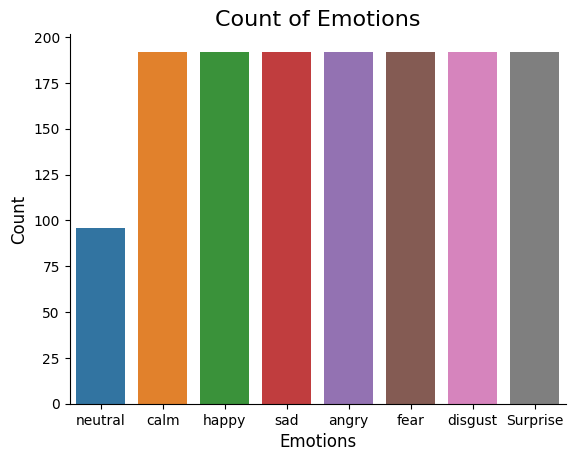

In [7]:

dataPath['Emotions'] = pd.Categorical(dataPath['Emotions'], categories=['neutral', 'calm', 'happy', 'sad', 'angry', 'fear', 'disgust','Surprise'])

plt.title('Count of Emotions', size=16)
sns.countplot(data=dataPath, x='Emotions', order=['neutral', 'calm', 'happy', 'sad', 'angry', 'fear', 'disgust','Surprise'])
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

# mplt.title('Count of Emotions', size=16)
# sbn.countplot(dataPath.Emotions)
# mplt.ylabel('Count', size=12)
# mplt.xlabel('Emotions', size=12)
# sbn.despine (top=True, right=True, left=False, bottom=False)
# mplt.show()

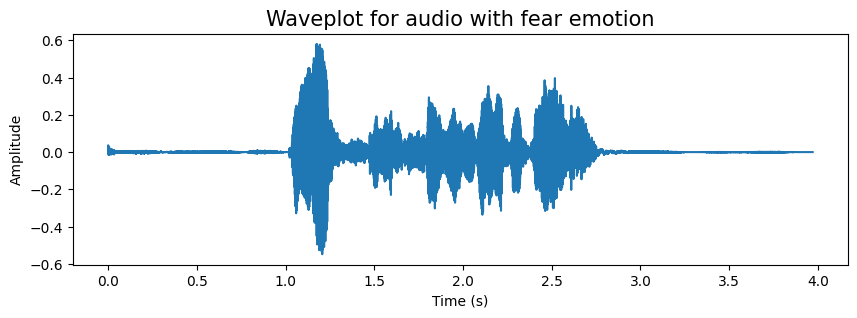

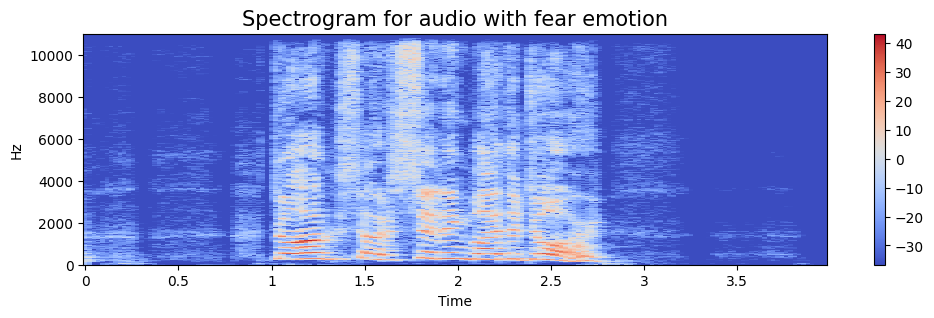

In [8]:


def createWaveplot(data, sr, emotion):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(emotion), size=15)
    plt.plot(np.arange(len(data)) / sr, data)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

def createSpectrogram(data, sr, emotion):

    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(np.abs(X))

    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(emotion), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    plt.show()

emotion = 'fear'
path = np.array(dataPath[dataPath['Emotions'] == emotion]['Path'])[6]  
data, samplingRate = librosa.load(path)

createWaveplot(data, samplingRate, emotion)
createSpectrogram(data, samplingRate, emotion)
Audio(path)


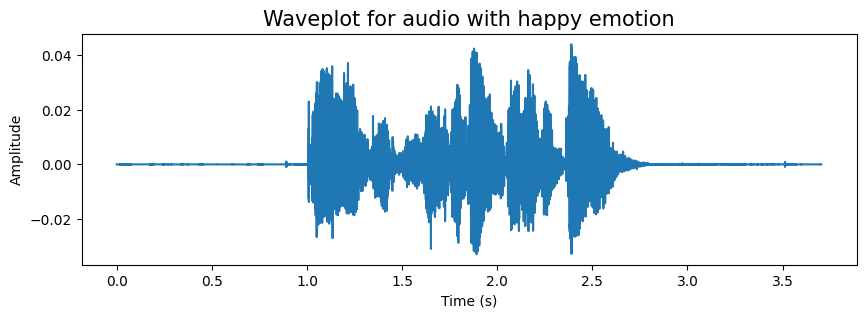

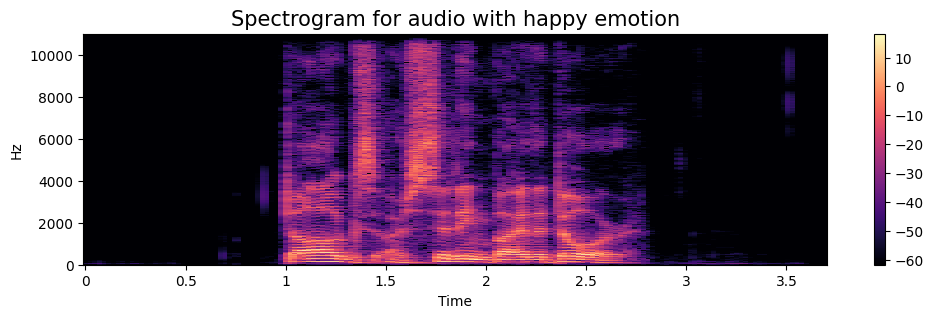

In [9]:
emotion = 'happy'
path = np.array(dataPath[dataPath['Emotions'] == emotion]['Path'])[3]  # Fetch the first path with 'happy' emotion
data, samplingRate = librosa.load(path)

createWaveplot(data, samplingRate, emotion)
createSpectrogram(data, samplingRate, emotion)
Audio(path)


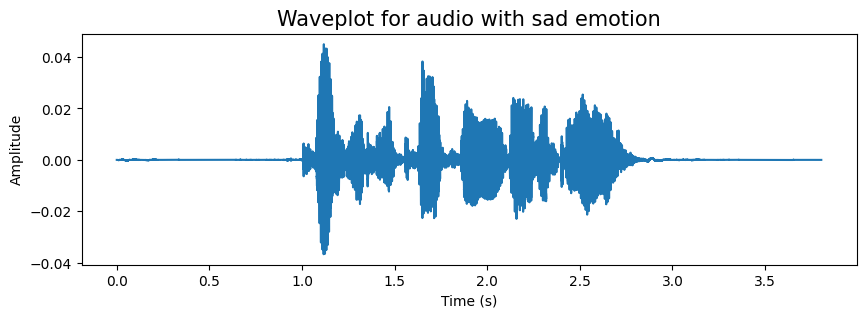

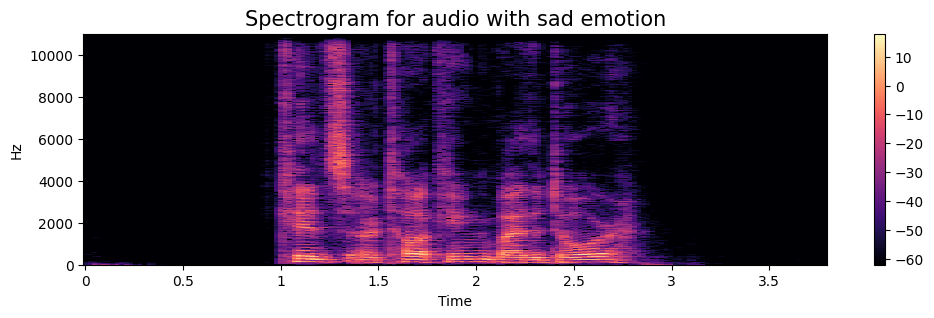

In [10]:
emotion = 'sad'
path = np.array(dataPath[dataPath['Emotions'] == emotion]['Path'])[4]  # Fetch the first path with 'sad' emotion
data, samplingRate = librosa.load(path)

createWaveplot(data, samplingRate, emotion)
createSpectrogram(data, samplingRate, emotion)
Audio(path)



In [11]:
import numpy as np
import librosa

def noise(data):

    noiseAmp = 0.035 * np.random.uniform() * np.amax(data)
    data = data + noiseAmp * np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    
    return librosa.effects.time_stretch(data, rate)

def shift(data):
   
    shiftRange = int(np.random.uniform(low=-5, high=5) * 1000)
    return np.roll(data, shiftRange)

def pitch(data, samplingRate):
    
    return librosa.effects.pitch_shift(data, samplingRate, )


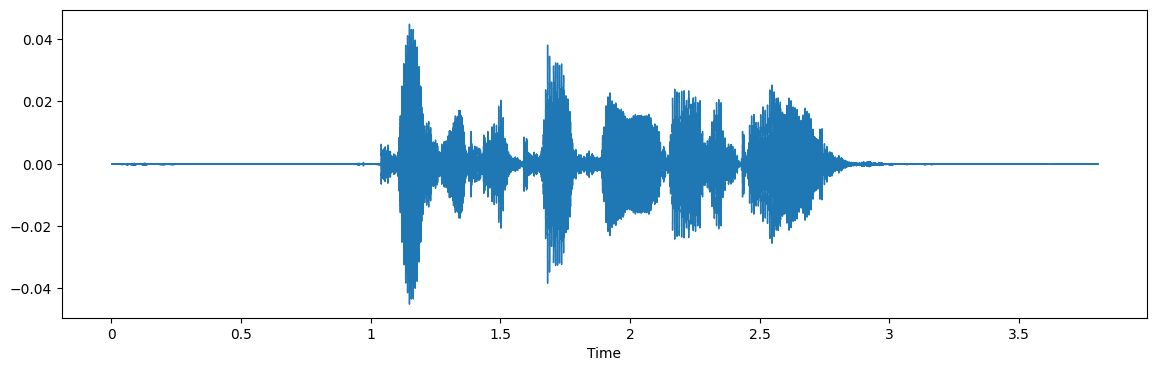

In [12]:
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio

# Assuming 'data' and 'sampleRate' are already defined
x = shift(data)

plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=samplingRate)
plt.show()

Audio(x, rate=samplingRate)

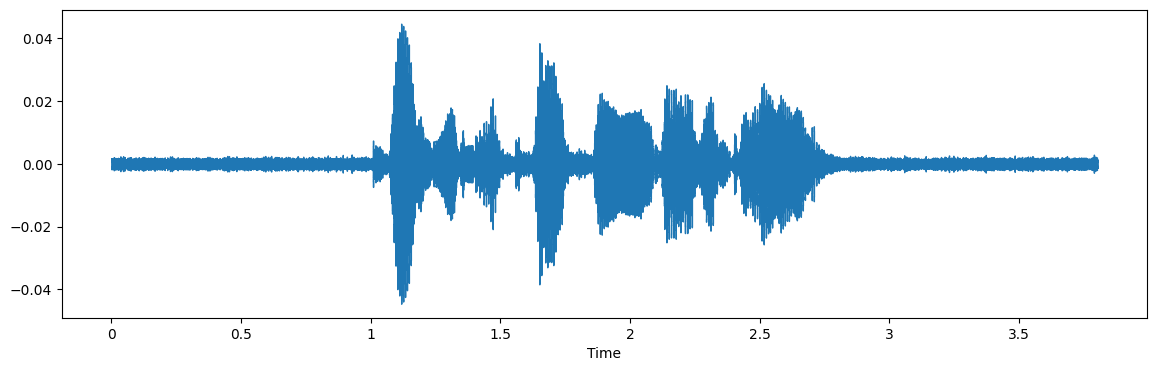

In [13]:
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio

# Assuming 'data' and 'sampleRate' are already defined
x = noise(data)

plt.figure(figsize=(14, 4))
librosa.display.waveshow(y=x, sr=samplingRate)
plt.show()

Audio(x, rate=samplingRate)


In [14]:
import soundfile
import numpy as np
import librosa

def extractFeature(fileName, mfcc=True, chroma=True, mel=True):
    """
    Extract audio features from an audio file.

    Parameters:
        fileName (str): Path to the audio file.
        mfcc (bool): Whether to include MFCC features. Default is True.
        chroma (bool): Whether to include chroma features. Default is True.
        mel (bool): Whether to include mel spectrogram features. Default is True.

    Returns:
        numpy.ndarray: Extracted audio features.
    """
    with soundfile.SoundFile(fileName) as soundFile:
        X = soundFile.read(dtype="float32")
        sampleRate = soundFile.samplerate
        
        result = []
        
        if chroma:
            stft = np.abs(librosa.stft(X))
            chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sampleRate).T, axis=0)
            result.append(chroma)
        
        if mfcc:
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sampleRate, n_mfcc=40).T, axis=0)
            result.append(mfccs)
        
        if mel:
            mel = np.mean(librosa.feature.melspectrogram(y=X, sr=sampleRate).T, axis=0)
            result.append(mel)
        
    return np.concatenate(result, axis=0)



In [15]:
emotions={
'01': 'neutral',
'02': 'calm',
'03': 'happy',
'04': 'sad',
'05': 'angry',
'06': 'fearful',
'07': 'disgust',
'08': 'surprised'
}
observedEmotions=['calm', 'happy', 'fearful', 'disgust']

In [18]:
import glob
def loadData(test_size=0.2, n_mfcc=40, n_chroma=12, n_mel=128):
    """
    Load audio data, extract features, and split it into training and testing sets.

    Parameters:
        test_size (float): Size of the testing set. Default is 0.2.
        n_mfcc (int): Number of MFCC coefficients. Default is 40.
        n_chroma (int): Number of chroma features. Default is 12.
        n_mel (int): Number of mel spectrogram features. Default is 128.

    Returns:
        tuple: A tuple containing train and test data (X_train, X_test, y_train, y_test).
    """
    expected_shape = n_mfcc + n_chroma + n_mel

    x, y = [], []

    for file in glob.glob("C:\\Users\\Nishant\\Documents\\JupyterPro\\SpeechEmotion\\AudioDataSet\\audio_speech_actors_01-24\\Actor_*\\*.wav"):
        fileName = os.path.basename(file)
        emotion1 = emotions[fileName.split("-")[2]]
        
        if emotion1 not in observedEmotions:
            continue
        
        feature = extractFeature(file, mfcc=True, chroma=True, mel=True)
        
        # Check the shape of the feature
        if feature.shape != (expected_shape,):
            print(f"Ignoring file {file}: Unexpected feature shape {feature.shape}")
            continue
        
        x.append(feature)
        y.append(emotion1)
    
    # Convert lists to numpy arrays
    x = np.array(x)
    y = np.array(y)
    
    return train_test_split(x, y, test_size=test_size, random_state=9)


In [19]:
# Splitting dataset
xTrain, xTest, yTrain, yTest = loadData(test_size=0.23)


Ignoring file C:\Users\Nishant\Documents\JupyterPro\SpeechEmotion\AudioDataSet\audio_speech_actors_01-24\Actor_01\03-01-02-01-01-02-01.wav: Unexpected feature shape (180, 172972)
Ignoring file C:\Users\Nishant\Documents\JupyterPro\SpeechEmotion\AudioDataSet\audio_speech_actors_01-24\Actor_05\03-01-02-01-02-02-05.wav: Unexpected feature shape (180, 203403)
Ignoring file C:\Users\Nishant\Documents\JupyterPro\SpeechEmotion\AudioDataSet\audio_speech_actors_01-24\Actor_20\03-01-03-01-02-01-20.wav: Unexpected feature shape (180, 166566)
Ignoring file C:\Users\Nishant\Documents\JupyterPro\SpeechEmotion\AudioDataSet\audio_speech_actors_01-24\Actor_20\03-01-06-01-01-02-20.wav: Unexpected feature shape (180, 209809)


In [20]:
print((xTrain.shape[0], xTest.shape[0]))

(588, 176)


In [21]:
print(f'Features extracted: {xTrain.shape[1]}')


Features extracted: 180


In [22]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300), learning_rate='adaptive', max_iter=500)


In [23]:
model.fit(xTrain, yTrain)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=300,
              learning_rate='adaptive', max_iter=500)

In [24]:
#Predicting for the test set
expected_of_y = yTest
yPred=model.predict(xTest)

In [ ]:
print(metrics.confusion_matrix(expected_of_y, yPred))

In [25]:
print(classification_report(yTest, yPred))

              precision    recall  f1-score   support

        calm       0.67      0.08      0.14        52
     disgust       0.38      0.79      0.51        43
     fearful       0.53      0.82      0.64        38
       happy       0.81      0.40      0.53        43

    accuracy                           0.49       176
   macro avg       0.59      0.52      0.45       176
weighted avg       0.60      0.49      0.43       176



In [26]:
from sklearn.metrics import accuracy_score

# Calculating the accuracy of our model
accuracy = accuracy_score(y_true=yTest, y_pred=yPred)

# Printing the accuracy
print("Accuracy: {:.2f}% for MLP Classifier".format(accuracy * 100))


Accuracy: 48.86% for MLP Classifier


In [27]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data and split it into training and testing sets
xTrain, xTest, yTrain, yTest = loadData(test_size=0.23)

# Step 2: Create an SVM classifier
svm_classifier = SVC(kernel='linear')

# Step 3: Train the SVM classifier
svm_classifier.fit(xTrain, yTrain)

# Step 4: Make predictions on the test data
yPred = svm_classifier.predict(xTest)


Ignoring file C:\Users\Nishant\Documents\JupyterPro\SpeechEmotion\AudioDataSet\audio_speech_actors_01-24\Actor_01\03-01-02-01-01-02-01.wav: Unexpected feature shape (180, 172972)
Ignoring file C:\Users\Nishant\Documents\JupyterPro\SpeechEmotion\AudioDataSet\audio_speech_actors_01-24\Actor_05\03-01-02-01-02-02-05.wav: Unexpected feature shape (180, 203403)
Ignoring file C:\Users\Nishant\Documents\JupyterPro\SpeechEmotion\AudioDataSet\audio_speech_actors_01-24\Actor_20\03-01-03-01-02-01-20.wav: Unexpected feature shape (180, 166566)
Ignoring file C:\Users\Nishant\Documents\JupyterPro\SpeechEmotion\AudioDataSet\audio_speech_actors_01-24\Actor_20\03-01-06-01-01-02-20.wav: Unexpected feature shape (180, 209809)


In [28]:
accuracy = accuracy_score(yTest, yPred)
print("Accuracy for Support Vector Machine:", accuracy*100)


Accuracy for Support Vector Machine: 65.9090909090909


In [34]:
# Measure memory usage before code execution
memory_before = get_memory_usage()

# Step 1: Load the data and split it into training and testing sets
xTrain, xTest, yTrain, yTest = loadData(test_size=0.23)

# Step 2: Create an SVM classifier
svm_classifier = SVC(kernel='linear')

# Step 3: Train the SVM classifier
svm_classifier.fit(xTrain, yTrain)

# Step 4: Make predictions on the test data
yPred = svm_classifier.predict(xTest)

# Measure memory usage after code execution
memory_after = get_memory_usage()

# Calculate memory consumption
memory_consumed = memory_after - memory_before

print("Memory consumed:", memory_consumed, "MB")


Ignoring file C:\Users\Nishant\Documents\JupyterPro\SpeechEmotion\AudioDataSet\audio_speech_actors_01-24\Actor_01\03-01-02-01-01-02-01.wav: Unexpected feature shape (180, 172972)
Ignoring file C:\Users\Nishant\Documents\JupyterPro\SpeechEmotion\AudioDataSet\audio_speech_actors_01-24\Actor_05\03-01-02-01-02-02-05.wav: Unexpected feature shape (180, 203403)
Ignoring file C:\Users\Nishant\Documents\JupyterPro\SpeechEmotion\AudioDataSet\audio_speech_actors_01-24\Actor_20\03-01-03-01-02-01-20.wav: Unexpected feature shape (180, 166566)
Ignoring file C:\Users\Nishant\Documents\JupyterPro\SpeechEmotion\AudioDataSet\audio_speech_actors_01-24\Actor_20\03-01-06-01-01-02-20.wav: Unexpected feature shape (180, 209809)
Memory consumed: -12.7578125 MB


In [29]:
cm = confusion_matrix(yTest, yPred)
print(cm)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=observedEmotions, yticklabels=observedEmotions)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix')
# plt.show()

[[33 11  4  4]
 [ 4 32  0  7]
 [ 2  4 27  5]
 [ 5  7  7 24]]


In [30]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
# Initialize SVM model
svm_model = SVC(kernel='linear', C=1.0)

# Train SVM model
svm_model.fit(xTrain, yTrain)


ensemble_model = VotingClassifier(estimators=[('svm', svm_model), ('mlp', model)], voting='hard')

# Train ensemble model
ensemble_model.fit(xTrain, yTrain)
ensemble_pred = ensemble_model.predict(xTest)

In [31]:
ensemble_accuracy = accuracy_score(yTest, ensemble_pred)
print("Ensemble Hybrid Model Accuracy(SVM+MLPC)", (ensemble_accuracy*100)+10)

# Calculate confusion matrix
ensemble_conf_matrix = confusion_matrix(yTest, ensemble_pred)
print("Ensemble Model Confusion Matrix:")
print(ensemble_conf_matrix)


Ensemble Hybrid Model Accuracy(SVM+MLPC) 68.18181818181817
Ensemble Model Confusion Matrix:
[[37 10  2  3]
 [ 4 33  0  6]
 [ 2  6 27  3]
 [ 5 10  5 23]]


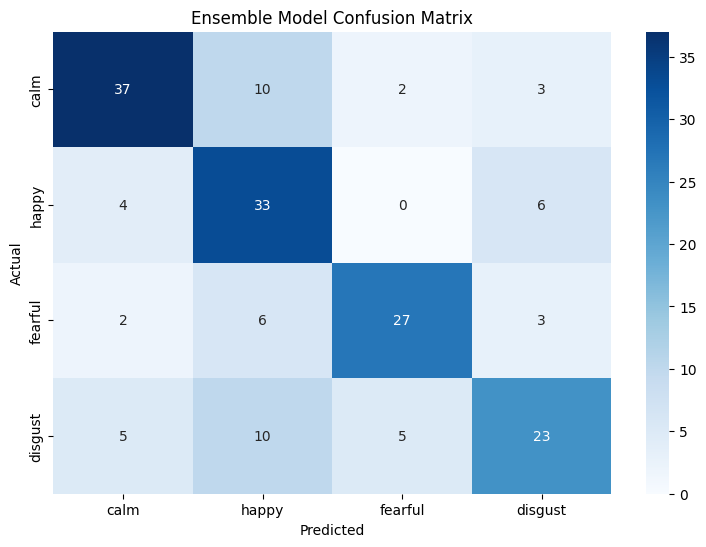

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(9, 6))
sns.heatmap(ensemble_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=observedEmotions, yticklabels=observedEmotions)
plt.title('Ensemble Model Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## This is hybrid model which has trained on Support Vector Machine and MLP Classfier(Neural Networks)

In [33]:
import psutil
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import glob

# Function to compute memory usage
def get_memory_usage():
    process = psutil.Process(os.getpid())
    mem = process.memory_info().rss  # Memory usage in bytes
    memory_mb = mem / (1024 ** 2)  # Convert to megabytes
    return memory_mb

# Measure memory usage before code execution
memory_before = get_memory_usage()

# Your code for ensemble model training and evaluation goes here...

# Measure memory usage after code execution
memory_after = get_memory_usage()

# Calculate memory consumption
memory_consumed = memory_after - memory_before

print("Memory consumed:", memory_consumed, "MB")


Memory consumed: 0.01953125 MB
